# Part C : Finding the best staff

## Name of the people who worked on this project

**Sangani Bhavin Pravinbhai**

**Himanshu Bhardwaj**

**Lakshmanan L**

**P Ashish**

![](321.jpg)

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


pd.set_option("display.max_columns",500)
pd.set_option('display.max_rows', 500)

### Getting both 2015 and 2020 dataset to do the comparison

In [2]:
#Getting both 2015 and 2020 dataset
df_15 = pd.read_csv("Data/players_15.csv")
df_15["year"] = 2015
df_20 = pd.read_csv("Data/players_20.csv")
df_20["year"] = 2020

In [3]:
df_15.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015


### Creating features to do the growth score

In [4]:
## Creating skillscore features as a combination of all skillscores
df_15 = df_15.fillna(0)
df_20 = df_20.fillna(0)
df_15['skillscore'] = df_15['pace']+df_15['shooting']+df_15['passing']+df_15['dribbling']+df_15['defending']+df_15['physic']+df_15['gk_diving']+df_15['gk_handling']+df_15['gk_kicking']+df_15['gk_reflexes']+df_15['gk_speed']+df_15['gk_positioning']
df_20['skillscore'] = df_20['pace']+df_20['shooting']+df_20['passing']+df_20['dribbling']+df_20['defending']+df_20['physic']+df_20['gk_diving']+df_20['gk_handling']+df_20['gk_kicking']+df_20['gk_reflexes']+df_20['gk_speed']+df_20['gk_positioning']

In order to create a skill score we are adding **pace**,**shooting**,**passing**,**dribbling**,**defending**,**physic**,**gk_diving** **gk_handling** **gk_kicking**, **gk_reflexes**,**gk_speed**,**gk_positioning** Columns from 2015 and 2020 data set.

### Keeping only the required columns to find the growing clubs and merging 2015 and 2020 dataset

In [5]:
df_15_sel = df_15[['sofifa_id','short_name','club','overall','potential','international_reputation','skillscore']]
df_20_sel = df_20[['sofifa_id','overall','potential','international_reputation','skillscore']]
df_20_sel.columns = ['sofifa_id','overall_20','potential_20','international_reputation_20','skillscore_20']

In [6]:
#merging the dataset 
data = df_15_sel.merge(df_20_sel,how='left')

In [7]:
##Keeping only players who are present both in 2015 and 2020
data_only = data.dropna()

### Getting only the required leagues

In [8]:
#reading the dataset 'fifa_teams.csc'
df_leagues = pd.read_csv("Data/fifa_teams.csv",encoding='latin')
df_leagues.rename(columns={"team":"club"},inplace =True)
df_leagues.head(3)

,ï»¿country,league,club,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,England,English Premier League,Leicester City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England,English Premier League,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,English Premier League,Tottenham Hotspur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#droping duplicates
len(data_only[data_only.club.isin(df_leagues.club.drop_duplicates())]['club'].drop_duplicates())

58

In [10]:
#merging the dataset  with df_leagues
data_only = data_only.merge(df_leagues,how='left')


### Finally we have 1240 players from 62 clubs to be graded. And see the performance of the club staff. But how do we say which staff is best. Our Approach is simple, if the player's skill is growing then the staff incharge are growing. 

In [11]:
data_only['strength_15'] = data_only['overall']+data_only['potential']+data_only['skillscore']
data_only['strength_20'] = data_only['overall_20']+data_only['potential_20']+data_only['skillscore_20']


Creating new feature strength for each year by adding **overall**, **potential**, **skillscore**

In [12]:
#Creating a pivote table and percentage growth column 
club_growth = pd.pivot_table(data_only,index=['league','club'],values=['strength_15','strength_20'],aggfunc=np.sum,fill_value=0).reset_index(drop=False)
club_growth['%_growth'] = ((club_growth['strength_20']/club_growth['strength_15'])-1)*100


In [13]:
club_growth = club_growth.sort_values('%_growth',ascending=False)
club_growth.head(10)

,league,club,strength_15,strength_20,%_growth
25,La Liga,RCD Espanyol,9523,10568,10.973433
34,Ligue 1,Angers SCO,3761,4104,9.119915
39,Ligue 1,OGC Nice,7934,8584,8.192589
24,La Liga,RC Celta,9136,9871,8.045096
36,Ligue 1,FC Nantes,9462,10196,7.757345
45,Serie A,Bologna,3785,3995,5.548217
7,Bundesliga,TSG 1899 Hoffenheim,12591,13287,5.527758
28,La Liga,Real Sociedad,8858,9323,5.249492
11,English Premier League,Chelsea,13071,13742,5.133502
22,La Liga,Athletic Club de Bilbao,12085,12700,5.088953


In club_growth dataframe  we have calcualted percentage growth for each club in each league.

### We have now ranked the clubs, but how can we be sure? We have chosed the international reputation of the player as the metric to evaluate if our ranking criteria is good

In [14]:
#Creating a pivote table and percentage growth reputation column  using international_reputation feature present in the original data set
club_growth2 = pd.pivot_table(data_only,index=['league','club'],values=['international_reputation','international_reputation_20'],aggfunc=np.sum,fill_value=0).reset_index(drop=False)
club_growth2['%_growth_reputation'] = ((club_growth2['international_reputation_20']/club_growth2['international_reputation'])-1)*100


In [15]:
club_growth2 = club_growth2.sort_values('%_growth_reputation',ascending=False)
club_growth2.head(10)

,league,club,international_reputation,international_reputation_20,%_growth_reputation
40,Ligue 1,Olympique Lyonnais,19,31,63.157895
30,La Liga,Sevilla FC,29,46,58.620690
33,Ligue 1,AS Monaco,26,41,57.692308
1,Bundesliga,Bayer 04 Leverkusen,22,33,50.000000
24,La Liga,RC Celta,19,27,42.105263
55,Serie A,Sassuolo,22,31,40.909091
57,Serie A,Udinese,20,28,40.000000
53,Serie A,Roma,31,43,38.709677
32,La Liga,Villarreal CF,25,34,36.000000
44,Serie A,Atalanta,17,23,35.294118


In club_growth2 dataframe  we have calcualted percentage growth reputation for each club in each league.

In [16]:
growth = round((club_growth2['international_reputation_20'].sum()/club_growth2['international_reputation'].sum()-1)*100,2)
print("The Overall International Reputation Growth of players  from 2015 to 2020 is ",growth)

The Overall International Reputation Growth of players  from 2015 to 2020 is  22.01


In [17]:
# merging the club_growth data with club_growth2
club_growth_new = club_growth.merge(club_growth2)


### Converting the percentage growth to a score

In [18]:
#normalizing the mean of percentage change in strength so that it can be used to assigning the score to a club
scaler = MinMaxScaler()
club_growth_new['score'] = scaler.fit_transform(club_growth_new['%_growth'].values.reshape(-1, 1) )

#multiplying the above scaled value by 100 to assign the score to a clubs
club_growth_new['score'] = np.round(club_growth_new['score']*100)

### Top 5 clubs which has the best staff

In [19]:
club_growth_new.head(5)

,league,club,strength_15,strength_20,%_growth,international_reputation,international_reputation_20,%_growth_reputation,score
0,La Liga,RCD Espanyol,9523,10568,10.973433,22,26,18.181818,100.0
1,Ligue 1,Angers SCO,3761,4104,9.119915,9,12,33.333333,86.0
2,Ligue 1,OGC Nice,7934,8584,8.192589,18,22,22.222222,80.0
3,La Liga,RC Celta,9136,9871,8.045096,19,27,42.105263,79.0
4,Ligue 1,FC Nantes,9462,10196,7.757345,19,23,21.052632,76.0


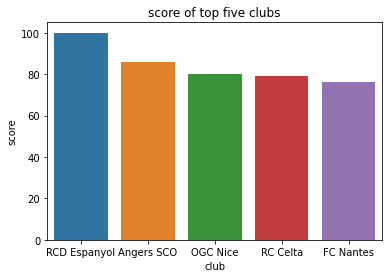

In [20]:
sns.barplot(x=club_growth_new['club'].head(5),y=club_growth_new['score'].head(5))
plt.xlabel('club')
plt.ylabel('score')
plt.title('score of top five clubs')
plt.show()

Finally we can Conclude that **Rcd** **Espanyol** and **Anger** **SCO** are top 2 Club in terms of best staffing  follwed by OGC Nice cub, RC Celta and FC Nantes

In [21]:
top_clubs_eval = round((club_growth_new.head(5)['international_reputation_20'].sum()/club_growth_new.head(5)['international_reputation'].sum()-1)*100,2)
print("Overall International Reputation Growth of players of top 5 clubs with best staff is ",top_clubs_eval,"%")

Overall International Reputation Growth of players of top 5 clubs with best staff is  26.44 %


### Bottom 5 clubs interms of staff

In [22]:
club_growth_new.tail(5)

,league,club,strength_15,strength_20,%_growth,international_reputation,international_reputation_20,%_growth_reputation,score
53,Serie A,Inter,9739,9692,-0.482596,26,34,30.769231,16.0
54,English Premier League,Crystal Palace,9357,9299,-0.619857,22,24,9.090909,15.0
55,Bundesliga,Borussia Dortmund,16572,16440,-0.796524,58,63,8.620690,14.0
56,English Premier League,Everton,12048,11859,-1.568725,38,39,2.631579,8.0
57,Serie A,Milan,7348,7150,-2.694611,24,29,20.833333,0.0


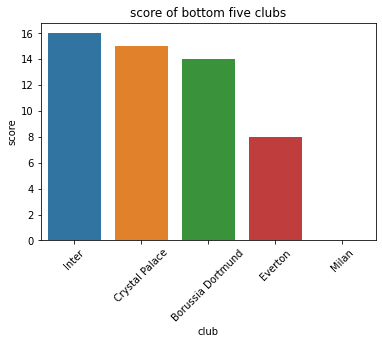

In [23]:
sns.barplot(x=club_growth_new['club'].tail(5),y=club_growth_new['score'].tail(5))
plt.xlabel('club')
plt.ylabel('score')
plt.title('score of bottom five clubs')
plt.xticks(rotation=45)
plt.show()

It can be easily interpreted from above graph that **Milan** and **Everton** are not performing well  as per our calcualted staffing scores


In [24]:
bottom_clubs_eval = round((club_growth_new.tail(5)['international_reputation_20'].sum()/club_growth_new.tail(5)['international_reputation'].sum()-1)*100,2)
print("Overall International Reputation Growth of players of Bottom 5 clubs with sbest staff is ",bottom_clubs_eval)

Overall International Reputation Growth of players of Bottom 5 clubs with sbest staff is  12.5
